[Text(0.4, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'Nationality <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'Experience <= 9.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3, 'Age <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

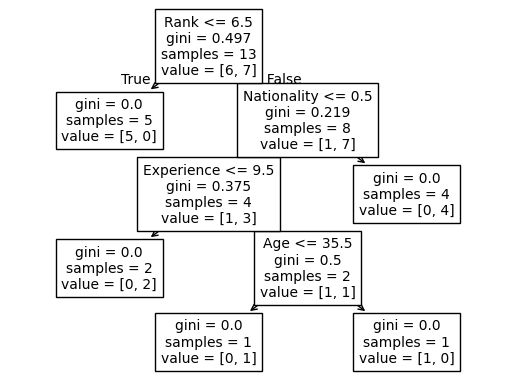

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\burge\Desktop\Book1.csv",
                 sep=";")
# In this example, a person will try to decide if he/she should go to a comedy show or not.
# To make a decision tree, all data has to be numerical.
# Convert Strings to numerical values
d = {"UK": 0, "USA": 1, "N": 2}
df["Nationality"] = df["Nationality"].map(d)
d = {"NO": 0, "YES": 1}
df["Go"] = df["Go"].map(d)

features = ["Age", "Experience", "Rank", "Nationality"]
X = df[features]
y = df["Go"]

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)
tree.plot_tree(dtree, feature_names=features)

In [65]:
import pandas as pd
df = pd.read_csv(r"~\Downloads\videolist_search50_2025_11_26-15_00_56.csv")
print(f"In the read document, there are {df.shape[0]} rows and {df.shape[1]} columns")

In the read document, there are 50 rows and 29 columns


In [66]:
"""
formatting headers
"""
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())

['position', 'channelid', 'channeltitle', 'videoid', 'publishedat', 'publishedatsql', 'videotitle', 'videodescription', 'tags', 'videocategoryid', 'videocategorylabel', 'topiccategories', 'duration', 'durationsec', 'dimension', 'definition', 'caption', 'defaultlanguage', 'defaultlaudiolanguage', 'thumbnail_maxres', 'licensedcontent', 'locationdescription', 'latitude', 'longitude', 'viewcount', 'likecount', 'dislikecount', 'favoritecount', 'commentcount']


In [67]:
"""
deleting unnecessesary columns
"""

df_dropped = df.drop(columns=['position', 'channelid', 'videoid', 'publishedatsql', 'videodescription', 'tags', 'videocategoryid', 'videocategorylabel', 
                   'topiccategories', 'dimension', 'definition', 'caption', 'defaultlanguage', 'thumbnail_maxres', 'licensedcontent', 'locationdescription', 'latitude', 
                   'longitude', 'favoritecount', "dislikecount"])
df = df_dropped
df.drop(0)

,channeltitle,publishedat,videotitle,duration,durationsec,defaultlaudiolanguage,viewcount,likecount,commentcount
1,Cigarettes After Sex,2017-03-20T19:51:04Z,Apocalypse - Cigarettes After Sex,PT4M51S,291,en,311419391.0,3076399.0,58740.0
2,Cigarettes After Sex,2022-07-20T21:29:53Z,Cigarettes After Sex (Full Album) - Cigarettes...,PT46M42S,2802,en,43379488.0,380551.0,4920.0
3,Cigarettes After Sex,2019-10-24T23:00:01Z,Cry - Cigarettes After Sex,PT4M17S,257,en,197117114.0,1518111.0,116268.0
4,Cigarettes After Sex,2022-07-20T21:25:17Z,Cry (Full Album) - Cigarettes After Sex,PT40M21S,2421,en,12214398.0,101456.0,1524.0
5,Cigarettes After Sex,2015-08-24T19:36:11Z,Nothing's Gonna Hurt You Baby - Cigarettes Aft...,PT4M47S,287,en,52078910.0,483025.0,9152.0
6,Cigarettes After Sex,2019-10-24T23:00:03Z,Don't Let Me Go - Cigarettes After Sex,PT4M23S,263,en,12134352.0,143936.0,2671.0
7,White Shadow,2024-09-01T05:22:52Z,"CIGARETTES AFTER S.E.X, BILLIE EILISH, EDMOFO,...",P0D,0,en-US,1220069.0,8671.0,0.0
8,Cigarettes After Sex,2023-07-18T04:00:06Z,Stop Waiting - Cigarettes After Sex,PT6M3S,363,en,18693740.0,169036.0,4555.0
9,Cigarettes After Sex,2019-08-28T18:43:10Z,Heavenly - Cigarettes After Sex,PT4M47S,287,en,44767388.0,492659.0,11747.0
10,Cigarettes After Sex,2017-06-09T18:06:02Z,Sunsetz - Cigarettes After Sex,PT3M35S,215,en,64411063.0,564217.0,7241.0
